In [1]:
import numpy as np
import scipy.io as sci
import matplotlib.pyplot as plt


['__header__', '__version__', '__globals__', 'FILE_NAME', 'FRAME_RATE', 'ANALOG_VIDEO_FRAME_RATIO', 'Left_Ankle_Angles', 'Left_Elbow_Angles', 'Left_Hip_Angles', 'Left_Knee_Angles', 'Left_Shoulder_Angles', 'Left_Wrist_Angles', 'Pelvis_Angles', 'Right_Ankle_Angles', 'Right_Elbow_Angles', 'Right_Hip_Angles', 'Right_Knee_Angles', 'Right_Shoulder_Angles', 'Right_Wrist_Angles', 'Trunk_Angles', 'Center_of_Mass']
__header__
__version__
__globals__
FILE_NAME
FRAME_RATE
ANALOG_VIDEO_FRAME_RATIO
Left_Ankle_Angles
Left_Elbow_Angles
Left_Hip_Angles
Left_Knee_Angles
Left_Shoulder_Angles
Left_Wrist_Angles
Pelvis_Angles
Right_Ankle_Angles
Right_Elbow_Angles
Right_Hip_Angles
Right_Knee_Angles
Right_Shoulder_Angles
Right_Wrist_Angles
Trunk_Angles
Center_of_Mass
2917
Shape (2917, 3)


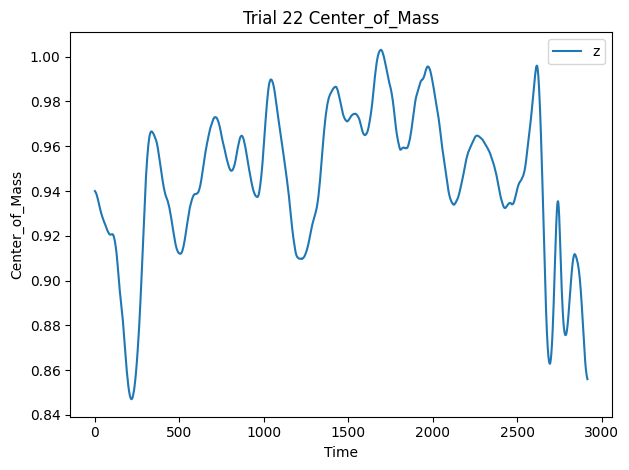

In [17]:

trial_number = 22
tracker = "Center_of_Mass"
mat_data = sci.loadmat('./data/Trial22 Kinematics.mat')

# Printing the keys in our .mat file. 
# print(mat_data.keys())  
keys = list(mat_data.keys())
print(keys)
for key in keys: 
    print(key)

center_of_mass_key = keys[-1]

data = mat_data[center_of_mass_key][0][0]
# print(data)
print(len(data))
print("Shape", data.shape)
time_passed = len(data)
time = range(time_passed)

# print(time)

plt.figure(1)
# plt.style.use('seaborn')
plt.plot(time, data.T[2])
plt.xlabel("Time")
plt.ylabel(tracker)
plt.title(f"Trial {trial_number} {tracker}")
# plt.legend(['x', 'y', 'z'])
plt.legend(['z'])

plt.tight_layout()
plt.savefig(f"Trial {trial_number} {tracker}")
plt.show()

# # # Accessing Center Of Mass Data
# print(mat_data[keys[-1]])


# # # # Printing the data raw. 
# # # print(mat_data)


NameError: name 'tracker' is not defined

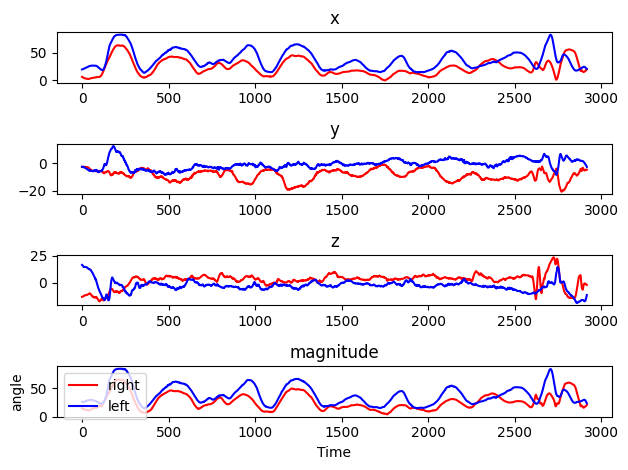

In [7]:

trial_number = 22
tracker1 = "Right_Knee_Angles"
tracker2 = "Left_Knee_Angles"
mat_data = sci.loadmat('./data/Trial22 Kinematics.mat')


right_data = mat_data["Right_Knee_Angles"][0][0]
left_data = mat_data["Left_Knee_Angles"][0][0]
# print(data)
time_passed = len(right_data)
time = range(time_passed)

# print(time)
fig, axs = plt.subplots(4,1)
for i in range(3):

    axs[i].plot(time, right_data.T[i], color = "red")
    axs[i].plot(time, left_data.T[i], color = "blue")
    axs[i].set_title(["x","y","z"][i])

axs[3].plot(time, np.sqrt(right_data.T[0]**2 + right_data.T[1]**2 + right_data.T[2]**2), color = "red")
axs[3].plot(time, np.sqrt(left_data.T[0]**2 + left_data.T[1]**2 + left_data.T[2]**2),color = "blue")
axs[3].set_title("magnitude")
plt.xlabel("Time")
plt.ylabel("angle")
plt.legend(['right', 'left'])

plt.tight_layout()
plt.savefig(f"Trial {trial_number} {tracker}")
plt.show()

# # # Accessing Center Of Mass Data
# print(mat_data[keys[-1]])


# # # # Printing the data raw. 
# # # print(mat_data)

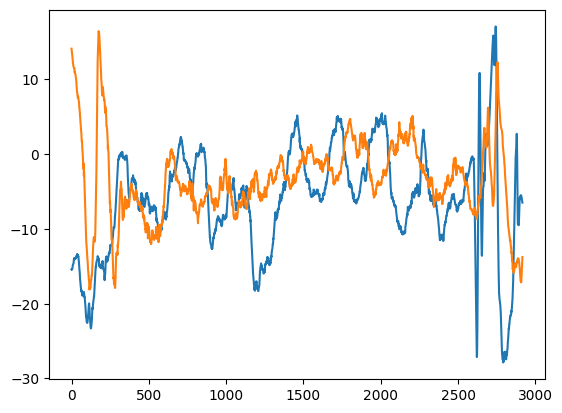

In [64]:
plt.plot(right_data.T[2]+right_data.T[1])
plt.plot(left_data.T[2]+left_data.T[1])


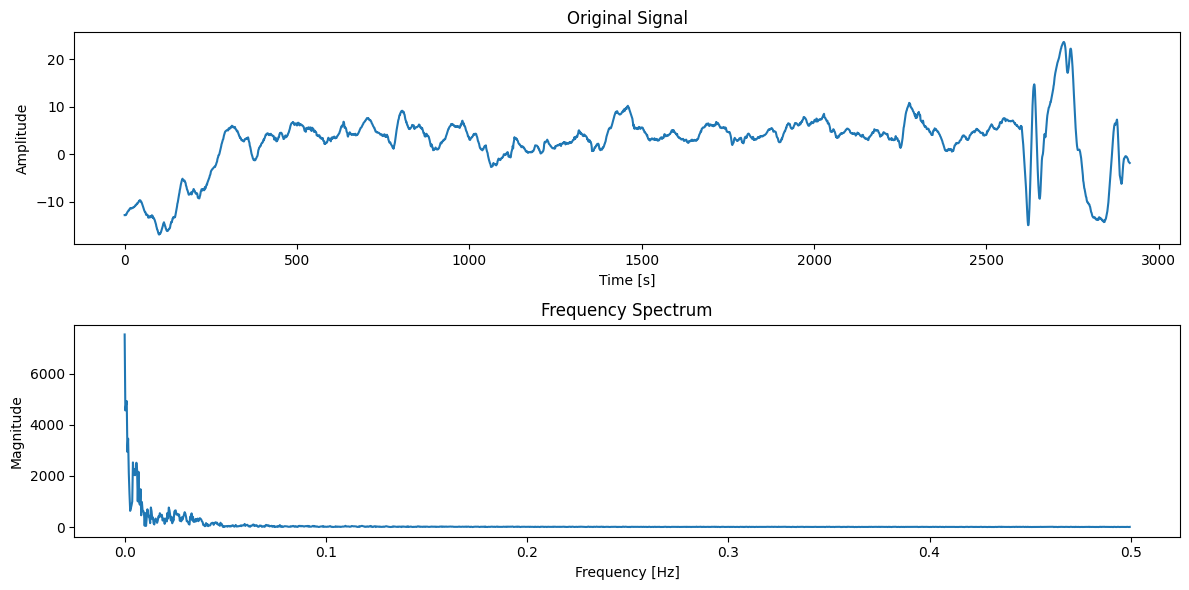

In [49]:
signal = data.T[2]

# Step 1: Calculate the sampling rate from the time array
T = time[1] - time[0]  # Sampling interval (assuming uniform sampling)
sampling_rate = 1.0 / T  # Sampling rate in Hz
N = len(signal)  # Length of the signal

# Step 2: Perform FFT
fft_result = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, T)

# Step 3: Plot the original signal and its frequency spectrum
plt.figure(figsize=(12, 6))

# Plot the original signal in time domain
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the frequency spectrum (magnitude)
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], np.abs(fft_result[:N//2]))  # Only positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

['__header__', '__version__', '__globals__', 'FILE_NAME', 'FRAME_RATE', 'ANALOG_VIDEO_FRAME_RATIO', 'Left_Ankle_Angles', 'Left_Elbow_Angles', 'Left_Hip_Angles', 'Left_Knee_Angles', 'Left_Shoulder_Angles', 'Left_Wrist_Angles', 'Pelvis_Angles', 'Right_Ankle_Angles', 'Right_Elbow_Angles', 'Right_Hip_Angles', 'Right_Knee_Angles', 'Right_Shoulder_Angles', 'Right_Wrist_Angles', 'Trunk_Angles', 'Center_of_Mass']
__header__
__version__
__globals__
FILE_NAME
FRAME_RATE
ANALOG_VIDEO_FRAME_RATIO
Left_Ankle_Angles
Left_Elbow_Angles
Left_Hip_Angles
Left_Knee_Angles
Left_Shoulder_Angles
Left_Wrist_Angles
Pelvis_Angles
Right_Ankle_Angles
Right_Elbow_Angles
Right_Hip_Angles
Right_Knee_Angles
Right_Shoulder_Angles
Right_Wrist_Angles
Trunk_Angles
Center_of_Mass
1 0
2 0
0 1
1 1
2 1
0 2


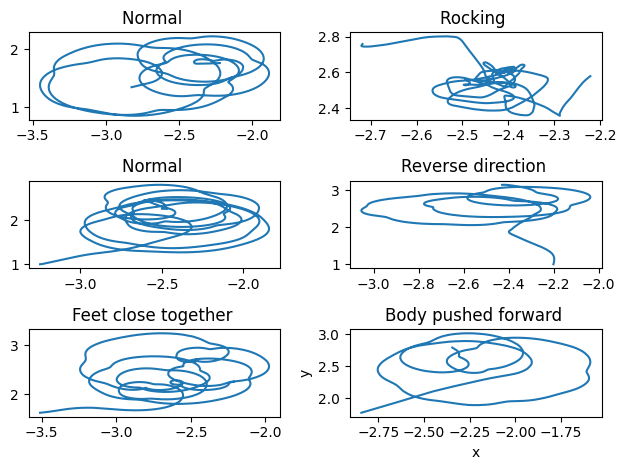

In [10]:
# Printing the keys in our .mat file. 
# print(mat_data.keys())  
keys = list(mat_data.keys())
print(keys)
for key in keys: 
    print(key)


center_of_mass_key = keys[-1]

fig, axs = plt.subplots(3,2)
i = 0
j= 0

trial_names = {1:"Normal", 4:"Normal", 6:"Feet close together", 15: "Rocking", 21: "Reverse direction", 22: "Body pushed forward"}
for trial_number in [1,4,6, 15,21,22]:
    
    tracker = "Center Of Mass"
    mat_data = sci.loadmat(f'./data/Trial{trial_number} Kinematics.mat')


    data = mat_data[center_of_mass_key][0][0]
    # print(data)
    #print(len(data))
    #print("Shape", data.shape)
    time_passed = len(data)
    time = range(time_passed)

    # print(time)

    
    # plt.style.use('seaborn')
    
    axs[i,j].plot(data.T[0] ,data.T[1])
    axs[i,j].set_title(f"{trial_names[trial_number]} ")
   
    i += 1 
    if i == 3:
        j+=1
        i=0
    print(i,j)

plt.xlabel("x")
plt.ylabel("y")



plt.tight_layout()
plt.savefig(f"Trial {trial_number} {tracker}")
plt.show()
